# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
import pandas as pd
import requests
import json
from api_keys import weather_api_key
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import json
import scipy.stats as st
from scipy.stats import linregress


cities_data="../Resources/cities.csv"

lat_range=(-90,90)
lng_range=(-180,180)

## Generate Cities List

In [14]:
#create lists to hold lattitude and longitude coordiantes
lat_lng=[]
cities=[]

#create locked tuple of latitude and longitude coordinates based on the range
lattitude=np.random.uniform(lat_range[0],lat_range[1],size=1500)
longitude=np.random.uniform(lng_range[0],lng_range[1],size=1500)

lats_and_lngs=zip(lattitude,longitude)

for n in lats_and_lngs:
    city=citipy.nearest_city(n[0],n[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(len(cities))


596


In [15]:
#create lists for variables to be created in new df
city_list=[]
temp_max=[]
hum=[]
cld=[]
wnd=[]
latt=[]
lng=[]
country=[]
date=[]

#initialize counter

units="imperial"
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
counter=0
set_counter=1

print("Initial Data Retrieval")
print("-----------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_list.append(response['name'])
        cld.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        latt.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wnd.append(response['wind']['speed'])
        if counter > 49:
            counter = 0
            set_counter = set_counter + 1
    
        else:
            counter = counter + 1
            
        print(f"Processing Record {counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Initial Data Retrieval
-----------------------
Processing Record 1 of Set 1 : mbamba
Processing Record 2 of Set 1 : torbay
Processing Record 3 of Set 1 : pedra branca
Processing Record 4 of Set 1 : mataura
Processing Record 5 of Set 1 : kruisfontein
Processing Record 6 of Set 1 : punta arenas
Processing Record 7 of Set 1 : bluff
Processing Record 8 of Set 1 : antalaha
Processing Record 9 of Set 1 : port blair
Processing Record 10 of Set 1 : kaitangata
Processing Record 11 of Set 1 : sibu
Processing Record 12 of Set 1 : ankang
Processing Record 13 of Set 1 : stafford
Processing Record 14 of Set 1 : ugoofaaru
Processing Record 15 of Set 1 : lamu
Processing Record 16 of Set 1 : abu dhabi
Processing Record 17 of Set 1 : buenos aires
Processing Record 18 of Set 1 : vaini
Processing Record 19 of Set 1 : anloga
City not found. Skipping...
Processing Record 20 of Set 1 : rikitea
City not found. Skipping...
Processing Record 21 of Set 1 : port elizabeth
Processing Record 22 of Set 1 : cidreira


Processing Record 35 of Set 4 : severo-kurilsk
Processing Record 36 of Set 4 : vardo
Processing Record 37 of Set 4 : saint-augustin
Processing Record 38 of Set 4 : cabo san lucas
Processing Record 39 of Set 4 : kosh-agach
Processing Record 40 of Set 4 : camacupa
Processing Record 41 of Set 4 : gat
Processing Record 42 of Set 4 : kendari
Processing Record 43 of Set 4 : deputatskiy
Processing Record 44 of Set 4 : ustka
Processing Record 45 of Set 4 : tabou
Processing Record 46 of Set 4 : srednekolymsk
Processing Record 47 of Set 4 : alma
Processing Record 48 of Set 4 : dikson
Processing Record 49 of Set 4 : izberbash
Processing Record 50 of Set 4 : lavrentiya
Processing Record 0 of Set 5 : bud
Processing Record 1 of Set 5 : rocha
City not found. Skipping...
Processing Record 2 of Set 5 : avarua
Processing Record 3 of Set 5 : santa maria
Processing Record 4 of Set 5 : el alto
Processing Record 5 of Set 5 : lata
Processing Record 6 of Set 5 : nouadhibou
Processing Record 7 of Set 5 : egvek

Processing Record 21 of Set 8 : oranjemund
Processing Record 22 of Set 8 : tias
Processing Record 23 of Set 8 : talnakh
Processing Record 24 of Set 8 : port-gentil
Processing Record 25 of Set 8 : roebourne
Processing Record 26 of Set 8 : homer
Processing Record 27 of Set 8 : mohan
Processing Record 28 of Set 8 : dargaville
Processing Record 29 of Set 8 : nuevo progreso
Processing Record 30 of Set 8 : nyandoma
Processing Record 31 of Set 8 : martin
Processing Record 32 of Set 8 : martapura
Processing Record 33 of Set 8 : tocache
Processing Record 34 of Set 8 : zholymbet
Processing Record 35 of Set 8 : tessalit
Processing Record 36 of Set 8 : ulladulla
Processing Record 37 of Set 8 : long beach
Processing Record 38 of Set 8 : pacific grove
City not found. Skipping...
Processing Record 39 of Set 8 : aranda de duero
Processing Record 40 of Set 8 : nakasongola
Processing Record 41 of Set 8 : muriwai beach
Processing Record 42 of Set 8 : vila do maio
Processing Record 43 of Set 8 : kensingto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
climate_dict={
          "City":city_list,
          "Country": country,
          "Wind Speed": wnd,
          "Cloudiness":cld,
          "Max Temperature": temp_max,
          "Humidity": hum,
          "Lattitude":latt,
          "Longitude": lng,
          "Date": date}
df = pd.DataFrame.from_dict(climate_dict, orient='index')
climate_df = df.transpose()
clean_climate_df=climate_df.dropna(how='any')
clean_climate_df.head()

,City,Country,Wind Speed,Cloudiness,Max Temperature,Humidity,Lattitude,Longitude,Date
0,Mbamba,NG,6.64,100,70.86,93,9.9833,13.1,1627301256
1,Torbay,CA,1.01,96,59.76,96,47.6666,-52.7314,1627301137
2,Pedra Branca,BR,10.4,6,76.68,59,-5.4542,-39.7172,1627301256
3,Mataura,NZ,7.72,100,48.47,94,-46.1927,168.8643,1627301256
4,Kruisfontein,ZA,19.42,100,73.89,21,-34.0033,24.7314,1627301257


In [18]:
clean_climate_df.count()

City               547
Country            547
Wind Speed         547
Cloudiness         547
Max Temperature    547
Humidity           547
Lattitude          547
Longitude          547
Date               547
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
clean_climate_df.loc[clean_climate_df['Humidity']<100]

,City,Country,Wind Speed,Cloudiness,Max Temperature,Humidity,Lattitude,Longitude,Date
0,Mbamba,NG,6.64,100,70.86,93,9.9833,13.1,1627301256
1,Torbay,CA,1.01,96,59.76,96,47.6666,-52.7314,1627301137
2,Pedra Branca,BR,10.4,6,76.68,59,-5.4542,-39.7172,1627301256
3,Mataura,NZ,7.72,100,48.47,94,-46.1927,168.8643,1627301256
4,Kruisfontein,ZA,19.42,100,73.89,21,-34.0033,24.7314,1627301257
...,...,...,...,...,...,...,...,...,...
542,Khorixas,NA,18.79,2,78.03,21,-20.3667,14.9667,1627301427
543,Novoagansk,RU,17.76,100,50.68,93,61.9449,76.6625,1627301427
544,Cayenne,GF,2.3,90,77.04,94,4.9333,-52.3333,1627301312
545,Obo,CF,5.26,99,80.78,67,5.3998,26.4869,1627301427


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [20]:
clean_climate_df.to_csv("../data/cities.csv", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

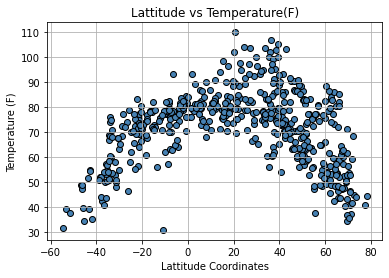

In [21]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Max Temperature"], facecolor = "steelblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Temperature(F)")
plt.ylabel("Temperature (F)")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_temperature.png")

## Latitude vs. Humidity Plot

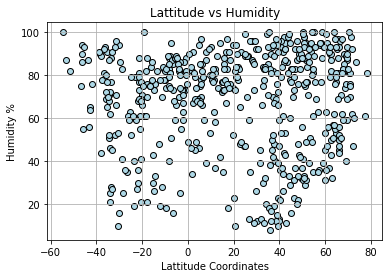

In [22]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Humidity"], facecolor = "lightblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_humidity.png")

## Latitude vs. Cloudiness Plot

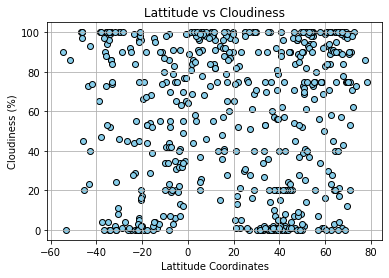

In [23]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Cloudiness"], facecolor = "skyblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

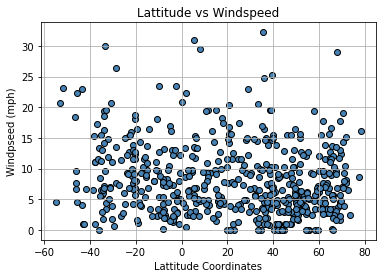

In [24]:
#plot
plt.scatter(clean_climate_df["Lattitude"], clean_climate_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

#labels
plt.title("Lattitude vs Windspeed")
plt.ylabel("Windpseed (mph)")
plt.xlabel("Lattitude Coordinates")
plt.grid()
plt.savefig("../Images/city_latt_vs_windspeed.png")

## Linear Regression

In [62]:
#set ranges for northern and southern hemisphere
northern_hem=clean_climate_df.loc[clean_climate_df['Lattitude']>=0]
southern_hem=clean_climate_df.loc[clean_climate_df['Lattitude']<0]

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# function for annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=12,color="red")
    

In [27]:

northern_hem["Max Temperature"].count()

374

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.59


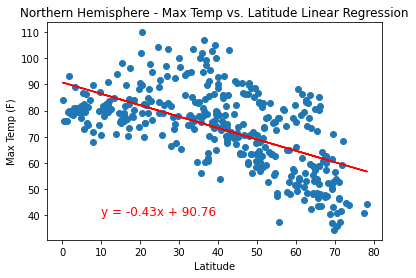

In [79]:
#linear agression function
equation=linear_agression(northern_hem["Lattitude"].astype(float),northern_hem["Max Temperature"].astype(float))
#annotation function 
annotate(equation, 10,40)

#labels

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


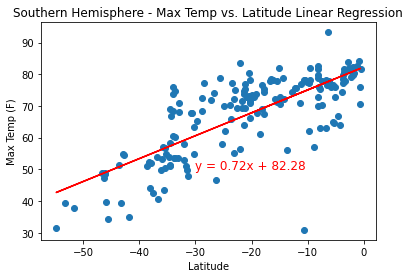

In [80]:
equation2=linear_agression(southern_hem["Lattitude"].astype(float),southern_hem["Max Temperature"].astype(float))
annotate(equation2, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.03


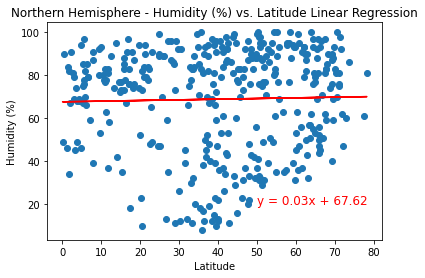

In [81]:
equation3=linear_agression(northern_hem["Lattitude"].astype(float),northern_hem["Humidity"].astype(float))
annotate(equation3, 50, 20)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.02


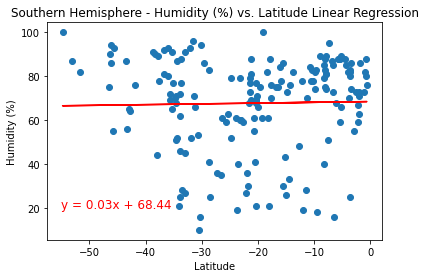

In [82]:
equation4=linear_agression(southern_hem["Lattitude"].astype(float),southern_hem["Humidity"].astype(float))
annotate(equation4, -55, 20)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")





####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.03


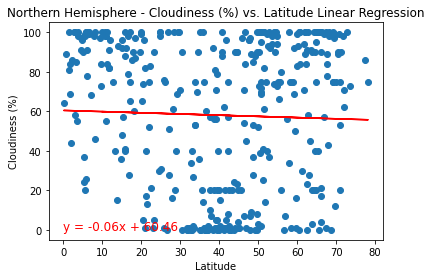

In [83]:
equation5=linear_agression(northern_hem["Lattitude"].astype(float),northern_hem["Cloudiness"].astype(float))
annotate(equation5, 0, 0)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.18


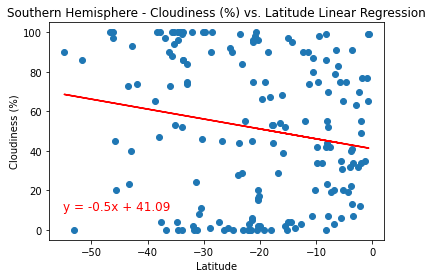

In [84]:
equation6=linear_agression(southern_hem["Lattitude"].astype(float),southern_hem["Cloudiness"].astype(float))
annotate(equation6, -55, 10)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.11


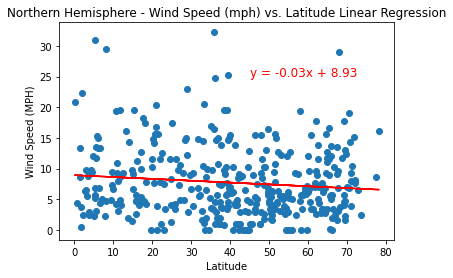

In [85]:
equation7=linear_agression(northern_hem["Lattitude"].astype(float),northern_hem["Wind Speed"].astype(float))
annotate(equation7, 45, 25)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.22


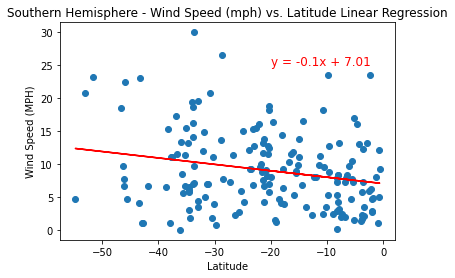

In [86]:
equation8=linear_agression(southern_hem["Lattitude"].astype(float),southern_hem["Wind Speed"].astype(float))
annotate(equation8, -20, 25)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

# Conclusions

1. I think the most clear insight and correlations was the Northern Hemisphere - Max Temp vs. Latitude Linear Regression and Southern Hemisphere - Max Temp vs. Latitude Linear Regression because they have the closest r coefficients to 1 and as the lng and latt close in on zero on both charts.  We can conclude that the temperature gets hotter the closer you get to the center of the earth.